# **Initial EDA (Exploratory Data Analysis)**

#### **Author:** Connell Phillipps

The purpose of this notebook will be to clean and refine the data provided from NYC Open Data to a database (.csv) so future modeling notebooks will run smooth. The main goal here is to delete any duplicate infromation and convert data types to those of useable one in modeling stages.<br>

After the cleaning a general overview of the data will be taken to build initial insites about the data and discover any trends or relationships that may be prsent.

In [1]:
#Initializing Libraries
#Data Science Foundation
import numpy as np
import pandas as pd

#Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

#Stats
from statsmodels.graphics.tsaplots import month_plot

In [2]:
#Initial Import
'''
If following along this is where you will need to update the file path below. As you can see here I have a seperate folder that is holding all my databases outside of this repository.
'''
df = pd.read_csv(r"C:\Users\cmphi\Documents\BrainStation\DataBases\NYPD_Calls_for_Service__Year_to_Date__20240520.csv")

## **Data Cleaning:**

In [3]:
#Fist look at the data
display(df.info(verbose=True, show_counts=True))
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805313 entries, 0 to 1805312
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CAD_EVNT_ID    1805313 non-null  int64  
 1   CREATE_DATE    1805313 non-null  object 
 2   INCIDENT_DATE  1805313 non-null  object 
 3   INCIDENT_TIME  358031 non-null   object 
 4   NYPD_PCT_CD    1805313 non-null  int64  
 5   BORO_NM        1805313 non-null  object 
 6   PATRL_BORO_NM  1805313 non-null  object 
 7   GEO_CD_X       1805313 non-null  int64  
 8   GEO_CD_Y       1805313 non-null  int64  
 9   RADIO_CODE     1805313 non-null  object 
 10  TYP_DESC       1805313 non-null  object 
 11  CIP_JOBS       1805313 non-null  object 
 12  ADD_TS         1805313 non-null  object 
 13  DISP_TS        1805313 non-null  object 
 14  ARRIVD_TS      1466133 non-null  object 
 15  CLOSNG_TS      1805313 non-null  object 
 16  Latitude       1805313 non-null  float64
 17  Longitud

None

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,99842231,01/01/2024,12/31/2023,11/22/2038 0:00:00,45,BRONX,PATROL BORO BRONX,1031438,249344,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:02:04 AM,01/01/2024 12:02:04 AM,NaN,01/01/2024 12:13:01 AM,40.850949,-73.829434
1,99842388,01/01/2024,12/31/2023,NaN,110,QUEENS,PATROL BORO QUEENS NORTH,1022087,208229,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:09:59 AM,01/01/2024 12:11:05 AM,NaN,01/01/2024 12:57:28 AM,40.738144,-73.863466
2,99842587,01/01/2024,12/31/2023,NaN,108,QUEENS,PATROL BORO QUEENS NORTH,1007298,209993,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,01/01/2024 12:01:21 AM,01/01/2024 12:02:19 AM,01/01/2024 01:19:58 AM,01/01/2024 01:20:02 AM,40.743037,-73.916826
3,99843964,01/01/2024,12/31/2023,NaN,114,QUEENS,PATROL BORO QUEENS NORTH,1002279,222019,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,01/01/2024 12:06:11 AM,01/01/2024 12:07:19 AM,01/01/2024 12:19:27 AM,01/01/2024 01:03:22 AM,40.776057,-73.934906
4,99844026,01/01/2024,12/31/2023,NaN,66,BROOKLYN,PATROL BORO BKLYN SOUTH,987908,174328,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:38 AM,01/01/2024 01:45:33 AM,NaN,01/01/2024 02:23:34 AM,40.645174,-73.986820
5,99844029,01/01/2024,12/31/2023,NaN,14,MANHATTAN,PATROL BORO MAN SOUTH,987695,213174,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:46 AM,01/01/2024 01:02:54 AM,NaN,01/01/2024 06:23:07 AM,40.751797,-73.987568
6,99844057,01/01/2024,12/31/2023,NaN,49,BRONX,PATROL BORO BRONX,1020929,254201,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:51 AM,01/01/2024 12:09:21 AM,01/01/2024 12:15:11 AM,01/01/2024 12:56:56 AM,40.864330,-73.867393
7,99844060,01/01/2024,12/31/2023,NaN,34,MANHATTAN,PATROL BORO MAN NORTH,1003734,253432,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:57 AM,01/01/2024 12:12:08 AM,01/01/2024 12:29:16 AM,01/01/2024 12:29:53 AM,40.862274,-73.929562
8,99844063,01/01/2024,01/01/2024,NaN,79,BROOKLYN,PATROL BORO BKLYN NORTH,998219,187289,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,01/01/2024 12:00:07 AM,01/01/2024 12:00:07 AM,01/01/2024 12:00:07 AM,01/01/2024 12:30:23 AM,40.680739,-73.949637
9,99844065,01/01/2024,01/01/2024,NaN,19,MANHATTAN,PATROL BORO MAN NORTH,992074,217827,53D,VEHICLE ACCIDENT: DISPUTE,Non CIP,01/01/2024 12:00:14 AM,01/01/2024 12:08:24 AM,01/01/2024 12:36:32 AM,01/01/2024 12:48:57 AM,40.764566,-73.971757


The main insite from the above is again, this is a very clean dat set to be working with. Main things I notice is the incident time is missing quite a lot of values and the some of the values inputed don't make sense (11/22/2038). This column is also represnted in `ADD_TS` and `ARRIVD_TS`. I will be dropping this column.<br><br>
I am also seeing duplicated column in `GEO_CD_X` and `GEO_CD_Y` and `Latitude` `Longitude`, I won't be needing both for this analysis so I will also drop the `GEO_CD` columns.<br><br>
Next, I looked at the `CREATE_DATE` column. This represent when the incident was inputed into the system. This is back end data entry by the operators and not reflective of the incident itself, Another column I will drop.

In [4]:
#dropping columns named above
df.drop(columns=['INCIDENT_TIME','GEO_CD_X','GEO_CD_Y','CREATE_DATE'], inplace=True, axis=1)

In [5]:
#peaking at data after drop
display(df.info(show_counts=True))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805313 entries, 0 to 1805312
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CAD_EVNT_ID    1805313 non-null  int64  
 1   INCIDENT_DATE  1805313 non-null  object 
 2   NYPD_PCT_CD    1805313 non-null  int64  
 3   BORO_NM        1805313 non-null  object 
 4   PATRL_BORO_NM  1805313 non-null  object 
 5   RADIO_CODE     1805313 non-null  object 
 6   TYP_DESC       1805313 non-null  object 
 7   CIP_JOBS       1805313 non-null  object 
 8   ADD_TS         1805313 non-null  object 
 9   DISP_TS        1805313 non-null  object 
 10  ARRIVD_TS      1466133 non-null  object 
 11  CLOSNG_TS      1805313 non-null  object 
 12  Latitude       1805313 non-null  float64
 13  Longitude      1805313 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 192.8+ MB


None

,CAD_EVNT_ID,INCIDENT_DATE,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,99842231,12/31/2023,45,BRONX,PATROL BORO BRONX,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:02:04 AM,01/01/2024 12:02:04 AM,NaN,01/01/2024 12:13:01 AM,40.850949,-73.829434
1,99842388,12/31/2023,110,QUEENS,PATROL BORO QUEENS NORTH,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:09:59 AM,01/01/2024 12:11:05 AM,NaN,01/01/2024 12:57:28 AM,40.738144,-73.863466
2,99842587,12/31/2023,108,QUEENS,PATROL BORO QUEENS NORTH,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,01/01/2024 12:01:21 AM,01/01/2024 12:02:19 AM,01/01/2024 01:19:58 AM,01/01/2024 01:20:02 AM,40.743037,-73.916826
3,99843964,12/31/2023,114,QUEENS,PATROL BORO QUEENS NORTH,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,01/01/2024 12:06:11 AM,01/01/2024 12:07:19 AM,01/01/2024 12:19:27 AM,01/01/2024 01:03:22 AM,40.776057,-73.934906
4,99844026,12/31/2023,66,BROOKLYN,PATROL BORO BKLYN SOUTH,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:38 AM,01/01/2024 01:45:33 AM,NaN,01/01/2024 02:23:34 AM,40.645174,-73.986820


#### **Weird post catches being fixed here**
This section came about when displaying the values of each column below. I noticed a subgroup of the data that had "null" values or `NYPD_PCT_CD`, `BORO_NM` and `PATRL_BORO_NM`. This is just a wiered input where null was input as a string '(null)'. If this were a large group of data I could find the average lat long for each `NYPD_PCT_CD`, `BORO_NM` and `PATRL_BORO_NM` and match these rows based on its lat long. However, these values only came up to 34 rows. That is negligable when dealing with 1.8 million rows so I will just be dropping it instead and pretending this never happend :).

In [6]:
df.loc[df['BORO_NM'] == '(null)'].head()

,CAD_EVNT_ID,INCIDENT_DATE,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
34514,99887159,01/02/2024,0,(null),(null),10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/02/2024 10:33:55 PM,01/02/2024 10:36:03 PM,NaN,01/02/2024 10:36:10 PM,40.914065,-73.908869
63342,99922516,01/04/2024,0,(null),(null),10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/04/2024 01:15:17 PM,01/04/2024 01:27:22 PM,NaN,01/04/2024 01:27:38 PM,40.678423,-73.725927
94972,99961396,01/06/2024,0,(null),(null),10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/06/2024 02:32:02 AM,01/06/2024 02:35:41 AM,NaN,01/06/2024 02:35:56 AM,40.724911,-73.722590
110579,99981088,01/06/2024,0,(null),(null),68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/06/2024 11:50:10 PM,01/06/2024 11:50:10 PM,01/06/2024 11:50:10 PM,01/07/2024 12:31:01 AM,40.764061,-73.722095
114834,99986261,01/07/2024,0,(null),(null),68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/07/2024 07:16:32 AM,01/07/2024 07:16:32 AM,01/07/2024 07:16:32 AM,01/07/2024 09:12:16 AM,40.910045,-73.851358


In [7]:
#Deleting rows
df = df[df['BORO_NM'] != '(null)']

#check to see if they are gone
df.loc[df['BORO_NM'] == '(null)']

,CAD_EVNT_ID,INCIDENT_DATE,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude


### **Duplicate Rows:**
Now I would like to move through and remove any duplicate data within this data set. First looking at rowise duplicates then moving to redundent columns.

In [8]:
#Checking for the number of duplicated rows
print(df.duplicated().sum())

0


Initially here it looks like there are no duplicate rows but we are going to dive a bit deeper and look specfically at `CAD_EVNT_ID` as this should be a unique identifier.

In [9]:
#If we have all unique values we should see the lenght of this be the same as the lenght of the df
df['CAD_EVNT_ID'].value_counts()
dup_CAD_percent = (1 - (len(df['CAD_EVNT_ID'].value_counts())/len(df)))*100
print(f'Percent of duplication: {dup_CAD_percent}%')

Percent of duplication: 3.014992704724706%


Before I drop all duplicated `CAD_EVNT_ID` I want to investigate to see why the rows aren't identical but they share a event id.

In [10]:
#displays the duplicated event ids next to one another
display(df[df.duplicated(subset=['CAD_EVNT_ID'], keep=False)])

,CAD_EVNT_ID,INCIDENT_DATE,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
16,99844075,01/01/2024,123,STATEN ISLAND,PATROL BORO STATEN ISLAND,54E2,AMBULANCE CASE: EDP/OUTSIDE,Non CIP,01/01/2024 12:01:10 AM,01/01/2024 12:57:08 AM,NaN,01/01/2024 12:57:30 AM,40.529657,-74.230212
17,99844075,01/01/2024,123,STATEN ISLAND,PATROL BORO STATEN ISLAND,54E2,AMBULANCE CASE: EDP/OUTSIDE,Non CIP,01/01/2024 12:05:27 AM,01/01/2024 12:10:23 AM,NaN,01/01/2024 12:58:37 AM,40.529657,-74.230212
38,99844110,01/01/2024,83,BROOKLYN,PATROL BORO BKLYN NORTH,59E,FIRE: EXPLOSION,Non CIP,01/01/2024 12:03:28 AM,01/01/2024 12:04:06 AM,NaN,01/01/2024 12:22:25 AM,40.692981,-73.924314
39,99844110,01/01/2024,83,BROOKLYN,PATROL BORO BKLYN NORTH,59E,FIRE: EXPLOSION,Non CIP,01/01/2024 12:03:28 AM,01/01/2024 12:05:14 AM,NaN,01/01/2024 12:22:45 AM,40.692981,-73.924314
61,99844138,01/01/2024,14,MANHATTAN,PATROL BORO MAN SOUTH,13X2,ASSIST POLICE OFFICER: UNKNOWN/OUTSIDE,Critical,01/01/2024 12:05:38 AM,01/01/2024 12:06:42 AM,01/01/2024 12:42:19 AM,01/01/2024 01:06:18 AM,40.755187,-73.983871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805236,102035988,03/31/2024,52,BRONX,PATROL BORO BRONX,54E2,AMBULANCE CASE: EDP/OUTSIDE,Non CIP,03/31/2024 11:54:09 PM,03/31/2024 11:54:49 PM,NaN,04/01/2024 12:18:31 AM,40.866513,-73.892632
1805244,102035998,03/31/2024,18,MANHATTAN,PATROL BORO MAN SOUTH,54E1,AMBULANCE CASE: EDP/INSIDE,Non CIP,03/31/2024 11:54:50 PM,03/31/2024 11:55:59 PM,NaN,04/01/2024 12:35:55 AM,40.763523,-73.987074
1805245,102035998,03/31/2024,18,MANHATTAN,PATROL BORO MAN SOUTH,54E1,AMBULANCE CASE: EDP/INSIDE,Non CIP,03/31/2024 11:54:50 PM,04/01/2024 12:01:33 AM,04/01/2024 12:14:42 AM,04/01/2024 12:37:59 PM,40.763523,-73.987074
1805264,102036019,03/31/2024,103,QUEENS,PATROL BORO QUEENS SOUTH,54E2,AMBULANCE CASE: EDP/OUTSIDE,Non CIP,03/31/2024 11:56:16 PM,03/31/2024 11:56:49 PM,04/01/2024 12:00:40 AM,04/01/2024 12:02:00 AM,40.691585,-73.795307


The differences I see here are mostly do to differences in the time added to they system. I am not sure what creates this discrepency but we will keep the instance with the most data (least NaN values) then if equal in data we will keep the first instance, as the datat is already sorted by time by dropping the later instances of duplicated values we will keep the entry with the earliest logged time.

In [11]:
#This code will keep the duplicated row with the least nan values, but in case of ties will just keep the first instance of the event id

#creating new row with null count
df['null_count'] = df.isna().sum(axis=1)

#sorting to priotizie rows with fewest nulls
df_sorted = df.sort_values(by=['CAD_EVNT_ID', 'null_count'])

df = df_sorted.drop_duplicates(subset='CAD_EVNT_ID').drop(columns='null_count').reset_index(drop=True)

In [12]:
#Checking
df['CAD_EVNT_ID'].value_counts()
dup_CAD_percent = (1 - (len(df['CAD_EVNT_ID'].value_counts())/len(df)))*100
print(f'Percent of duplication: {dup_CAD_percent}%')
display(df[df.duplicated(subset=['CAD_EVNT_ID'], keep=False)])
display(df.info(show_counts=True))

Percent of duplication: 0.0%


,CAD_EVNT_ID,INCIDENT_DATE,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750849 entries, 0 to 1750848
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CAD_EVNT_ID    1750849 non-null  int64  
 1   INCIDENT_DATE  1750849 non-null  object 
 2   NYPD_PCT_CD    1750849 non-null  int64  
 3   BORO_NM        1750849 non-null  object 
 4   PATRL_BORO_NM  1750849 non-null  object 
 5   RADIO_CODE     1750849 non-null  object 
 6   TYP_DESC       1750849 non-null  object 
 7   CIP_JOBS       1750849 non-null  object 
 8   ADD_TS         1750849 non-null  object 
 9   DISP_TS        1750849 non-null  object 
 10  ARRIVD_TS      1460865 non-null  object 
 11  CLOSNG_TS      1750849 non-null  object 
 12  Latitude       1750849 non-null  float64
 13  Longitude      1750849 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 187.0+ MB


None

This shows the succesful removal of all duplicated `CAD_EVNT_ID` rows. The data set is now ~3% smaller.

The next step here will be to deal with the `ARRIVD_TS`. This is now the only column with null values. My plan here will be to create one main df that has only one of the date time columns with `ADD_TS`. This will reprent the start time of the incident and for most purpose be the only datetime we need. The second df I will be keeping `DISP_TS` and `ARRIVD_TS` this is will allow me to look response times all other datetime will be dropped. I will then drop any row with null values as they will be represented in the main df.

In [13]:
# Creating response_df
response_df = df.drop(columns=['INCIDENT_DATE', 'ADD_TS', 'CLOSNG_TS'], axis=1)
response_df = response_df.dropna(how='any', axis=0).reset_index(drop=True)

# Creating main df
df.drop(columns=['INCIDENT_DATE', 'DISP_TS', 'ARRIVD_TS', 'CLOSNG_TS'], inplace=True)

In [14]:
#Checking
display(df.info())
display(df.head())
display(response_df.info())
display(response_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750849 entries, 0 to 1750848
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CAD_EVNT_ID    int64  
 1   NYPD_PCT_CD    int64  
 2   BORO_NM        object 
 3   PATRL_BORO_NM  object 
 4   RADIO_CODE     object 
 5   TYP_DESC       object 
 6   CIP_JOBS       object 
 7   ADD_TS         object 
 8   Latitude       float64
 9   Longitude      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 133.6+ MB


None

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,Latitude,Longitude
0,99842231,45,BRONX,PATROL BORO BRONX,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:02:04 AM,40.850949,-73.829434
1,99842388,110,QUEENS,PATROL BORO QUEENS NORTH,52D6,DISPUTE: FAMILY,Non CIP,01/01/2024 12:09:59 AM,40.738144,-73.863466
2,99842587,108,QUEENS,PATROL BORO QUEENS NORTH,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,01/01/2024 12:01:21 AM,40.743037,-73.916826
3,99843964,114,QUEENS,PATROL BORO QUEENS NORTH,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,01/01/2024 12:06:11 AM,40.776057,-73.934906
4,99844026,66,BROOKLYN,PATROL BORO BKLYN SOUTH,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:04:38 AM,40.645174,-73.986820


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460865 entries, 0 to 1460864
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CAD_EVNT_ID    1460865 non-null  int64  
 1   NYPD_PCT_CD    1460865 non-null  int64  
 2   BORO_NM        1460865 non-null  object 
 3   PATRL_BORO_NM  1460865 non-null  object 
 4   RADIO_CODE     1460865 non-null  object 
 5   TYP_DESC       1460865 non-null  object 
 6   CIP_JOBS       1460865 non-null  object 
 7   DISP_TS        1460865 non-null  object 
 8   ARRIVD_TS      1460865 non-null  object 
 9   Latitude       1460865 non-null  float64
 10  Longitude      1460865 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 122.6+ MB


None

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,RADIO_CODE,TYP_DESC,CIP_JOBS,DISP_TS,ARRIVD_TS,Latitude,Longitude
0,99842587,108,QUEENS,PATROL BORO QUEENS NORTH,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,01/01/2024 12:02:19 AM,01/01/2024 01:19:58 AM,40.743037,-73.916826
1,99843964,114,QUEENS,PATROL BORO QUEENS NORTH,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,01/01/2024 12:07:19 AM,01/01/2024 12:19:27 AM,40.776057,-73.934906
2,99844057,49,BRONX,PATROL BORO BRONX,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:09:21 AM,01/01/2024 12:15:11 AM,40.864330,-73.867393
3,99844060,34,MANHATTAN,PATROL BORO MAN NORTH,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2024 12:12:08 AM,01/01/2024 12:29:16 AM,40.862274,-73.929562
4,99844063,79,BROOKLYN,PATROL BORO BKLYN NORTH,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,01/01/2024 12:00:07 AM,01/01/2024 12:00:07 AM,40.680739,-73.949637


### **General Data Fixing:**

Now I want to move from left to right and assure the data is presented ina way that makes sense and is more readily presentable.<br>
This will also be the best time to look at the columns as compared to one another and determine if there are redundancies that can be removed.<br><br>

1. CAD_EVNT_ID -> **int64**
    * Should be fine all ids are numerical, a mean or average of this column will mean nothing
2. INCIDENT_DATE  -> object
    * Makes more sense and will be easier to call functions as a **datetime**. All times will be set to 00 however.
3. NYPD_PCT_CD -> int64
    * Values are numerical, may want to change to **categorical**
4. BORO_NM -> object
    * Redundant with PATRL_BORO_NM, need to deside which to keep (more granular or less granular)
    * Change to **categorical**
5. PATRL_BORO_NM -> object
    * Starts all with PATROL BORO I can drop that and keep the boro then change to **categorical**
6. RADIO_CODE -> object
    * Will need to do a deeper dive to determien is the codes are better to save the relate to this [database](https://www.n2nov.net/nypdcodes.html)
    * Change to **categorical**
7. TYP_DESC -> object
    * Redundent on radio code will drop one, probably this one
8. CIP_JOBS -> object
    * Change to **categorical**
9. ADD_TS -> object
    * Change to **datetime**
10. DISP_TS -> object
    * Change to **datetime**
11. ARRIVD_TS -> object
    * Change to **datetime**
12. CLOSNG_TS -> object
    * Change to **datetime**<br>

**NOTE:**<br> Potential reudundancy in the TS columns, so intresting insights still exist but will be better when looked at as a seperated df and will only keep one datetime in main df.

13. Latitude -> **float64**
    * This will stay a float
14. Longitude -> **float64**
    * This will stay a float


In [15]:
### Main df ###
# Converting specified columns to datetime
df['ADD_TS'] = pd.to_datetime(df['ADD_TS'], format='%m/%d/%Y %I:%M:%S %p')

# Converting specified columns to category
category_columns = ['NYPD_PCT_CD', 'BORO_NM', 'RADIO_CODE', 'CIP_JOBS']
for col in category_columns:
    df[col] = df[col].astype('category')

# Dropping redundant columns
df.drop(columns=['PATRL_BORO_NM', 'TYP_DESC'], axis=1, inplace=True)


### response_df ###
# Converting specified columns to datetime
datetime_columns = ['DISP_TS', 'ARRIVD_TS']
for col in datetime_columns:
    response_df[col] = pd.to_datetime(response_df[col], format='%m/%d/%Y %I:%M:%S %p')

# Converting specified columns to category
for col in category_columns:
    response_df[col] = response_df[col].astype('category')

# Dropping redundant columns
response_df.drop(columns=['PATRL_BORO_NM', 'TYP_DESC'], inplace=True)

In [16]:
#New look at CLEANED data
display(df.info(show_counts=True))
display(df.head())

display(response_df.info(show_counts=True))
display(response_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750849 entries, 0 to 1750848
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   CAD_EVNT_ID  1750849 non-null  int64         
 1   NYPD_PCT_CD  1750849 non-null  category      
 2   BORO_NM      1750849 non-null  category      
 3   RADIO_CODE   1750849 non-null  category      
 4   CIP_JOBS     1750849 non-null  category      
 5   ADD_TS       1750849 non-null  datetime64[ns]
 6   Latitude     1750849 non-null  float64       
 7   Longitude    1750849 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(1)
memory usage: 61.8 MB


None

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,RADIO_CODE,CIP_JOBS,ADD_TS,Latitude,Longitude
0,99842231,45,BRONX,52D6,Non CIP,2024-01-01 00:02:04,40.850949,-73.829434
1,99842388,110,QUEENS,52D6,Non CIP,2024-01-01 00:09:59,40.738144,-73.863466
2,99842587,108,QUEENS,53S,Non CIP,2024-01-01 00:01:21,40.743037,-73.916826
3,99843964,114,QUEENS,34K1,Critical,2024-01-01 00:06:11,40.776057,-73.934906
4,99844026,66,BROOKLYN,11C4,Non CIP,2024-01-01 00:04:38,40.645174,-73.986820


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460865 entries, 0 to 1460864
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   CAD_EVNT_ID  1460865 non-null  int64         
 1   NYPD_PCT_CD  1460865 non-null  category      
 2   BORO_NM      1460865 non-null  category      
 3   RADIO_CODE   1460865 non-null  category      
 4   CIP_JOBS     1460865 non-null  category      
 5   DISP_TS      1460865 non-null  datetime64[ns]
 6   ARRIVD_TS    1460865 non-null  datetime64[ns]
 7   Latitude     1460865 non-null  float64       
 8   Longitude    1460865 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(2), int64(1)
memory usage: 62.7 MB


None

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,RADIO_CODE,CIP_JOBS,DISP_TS,ARRIVD_TS,Latitude,Longitude
0,99842587,108,QUEENS,53S,Non CIP,2024-01-01 00:02:19,2024-01-01 01:19:58,40.743037,-73.916826
1,99843964,114,QUEENS,34K1,Critical,2024-01-01 00:07:19,2024-01-01 00:19:27,40.776057,-73.934906
2,99844057,49,BRONX,11C4,Non CIP,2024-01-01 00:09:21,2024-01-01 00:15:11,40.864330,-73.867393
3,99844060,34,MANHATTAN,11C4,Non CIP,2024-01-01 00:12:08,2024-01-01 00:29:16,40.862274,-73.929562
4,99844063,79,BROOKLYN,75S,Non CIP,2024-01-01 00:00:07,2024-01-01 00:00:07,40.680739,-73.949637


## **Data Exploration:**
Now that the data is clean I will take a closer look at each column and the distribution of the values. Then we will create some visually to explore some of the findings even deaper to start to being to create a story based on the data.

In [17]:
df['ADD_TS'].max()

Timestamp('2024-03-31 23:59:56')

#### **Categorical Data Distribitions:**

Plot created with help from chatGPT:<br>
Summary of prompt:<br>
Create a subplot of bar charts using plotly express to show categroical distribuitions using this code style:<br>
I then input the code from EDA notebook that had the for loop on enumerate cat_col. Smaller prompts were then asked to help refine the format till the desired end product.

In [18]:
#Plotting categorical columns
fig = make_subplots(rows=4, cols=1, subplot_titles=category_columns, vertical_spacing=.05)

for i, col in enumerate(category_columns):
    # row = (i // 2) + 1 #--- had a 2x2 wanted to change, though code was cool so kept it
    # col_pos = (i % 2) + 1
    row = i+1
    trace = go.Bar(x=df[col].unique(), y=df[col].value_counts(), name=col)
    fig.add_trace(trace, row=row, col=1) #col=col_pos
    fig.update_yaxes(title_text='Total Number of Calls')
    #Setting log scale to make graphs more ledgable...
    if i == 2 or 3:
      fig.update_yaxes(type="log", row=row, col=1)

fig.update_xaxes(matches='x')
fig.update_layout(
    title_text='Category Plots',
    width=1700,
    height=2000,
    margin=dict(l=15, r=10, t=50, b=10)
)
fig.show()

##### Insights:
* With the first distribution we are looking at total call volume by NYPD precinct. NYC precincts are differenciated by number, the graph above is then ploting those on a numeric x axis. Any number missing a bar doesn't have a corrilating precinct. However, from this chart we can defently see a difference in volume. Precinct 22 has the lowest call volume with ~4,500, this precinct belongs to the central park precint. This would make sense as there are no resident of central park so by people living in the area is close to zero. The precinct with the highest call volume is 45, located in the bronx, this makes sense as when we look at call volume by burrow the bornx has the highest volume.
* With the next distribution we are looking at call distribution by burrow. As reflected above, we see that the bronx has the highest call volume. To assure that this is not due to a larger population I refered to a [NYC population map](https://www.citypopulation.de/en/usa/newyorkcity/). The burrow with the largest population is brooklyn. This data could then reflect the 911 emergency rate in the bronx is the highest of all the burrows. Next the borough with the lowest call volume is staten island. This is probably mostly do to population as it has the lowest population of any burrow by a factor of 4.
* The next graph looks at the distribution of calls broken down by radio code, an event identifier. This graph had to be put on a log scale for visibility as there is a large discrepency between the most frequent and least frequenct call event types. Using a [radio code interpritaion website](https://www.n2nov.net/nypdcodes.html) The two event types with the highest frequency are dispute(dispute) and vehicle acident, then relatively closely followed by assult(knife). There are then many radio codes that came up only once or twice its not worth diving into all of them but they involve things like mostly due to operational codes like research(disabled vehicle).
* Finally we see a breakdown of crime in progress. Againg this graph was placed on a log scale to get a better view of the column breakdowns. The vast majority of calls are not in progress crimes (1.6M). While the highest flag (serious) has a low volume of calls (~17,000).

#### **Distribution by datetime:**
There aren't really any numerical values to represent here so I thought it would be good to look at the call distribution by datetime.
* how many calls by month
* how many calls by day of week
* how many call within each hour of day

In [19]:
value_counts = df['ADD_TS'].dt.year.value_counts().sort_index()
print(value_counts)

ADD_TS
2024    1750849
Name: count, dtype: int64


Plot created with help from chatGPT:<br>
Summary of prompt:<br>
Using format of the subplot create above, create a distribution based on a datetime column broken down by year, month, day of week, and hour of day. I then modified and added correct dataframe name and column names. I had to ask to sort based on calnder order.

In [20]:
fig = make_subplots(
    rows=4, cols=1, 
    subplot_titles=("Year", "Month", "Day of Week", "Hour of Day"), 
    vertical_spacing=0.05
)

# Plotting for each datetime component
datetime_components = ['Year', 'Month', 'Day of Week', 'Hour of Day']
for i, col in enumerate(datetime_components):
    row = i + 1
    if col == 'Month':
        # Order months correctly
        month_order = ["January", "February", "March", "April", "May", "June", 
                       "July", "August", "September", "October", "November", "December"]
        value_counts = df['ADD_TS'].dt.month_name().value_counts().reindex(month_order)
        trace = go.Bar(x=value_counts.index, y=value_counts.values, name=col)
    elif col == 'Day of Week':
        # Order days of the week correctly
        day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        value_counts = df['ADD_TS'].dt.day_name().value_counts().reindex(day_order)
        trace = go.Bar(x=value_counts.index, y=value_counts.values, name=col)
    elif col == 'Hour of Day':
        value_counts = df['ADD_TS'].dt.hour.value_counts().sort_index()
        trace = go.Bar(x=value_counts.index, y=value_counts.values, name=col)
    else:
        value_counts = df['ADD_TS'].dt.year.value_counts().sort_index()
        trace = go.Bar(x=value_counts.index, y=value_counts.values, name=col)
    fig.add_trace(trace, row=row, col=1)

# Update layout to ensure independent x-axes
fig.update_layout(
    title_text='Datetime Distributions',
    width=1700,
    height=2000,
    margin=dict(l=15, r=10, t=50, b=10)
)

# Show figure
fig.show()

#### Insights:
* The first graph really only shows that currently the data set being worked with only has call form 2024. This is subject to change as I will work on webscraping and populating date back to ~2018 to get a better view of the total data.
* Next we are looking at the call distribution by month, Again this data set is incomplete and will be added to when the API is more understood. For now we can see a light rise in call rate from Febuary to March.
* The 3rd graph is showing call breakdown by week day. The insight here shows that call frequcny increase on fridays probably as people are more rowdy as they celebrate the end of the work week. With Monday showing the opposite trend having the lowest call volume.
* Finally, We look at call distribution by hour of the day. Here we see 5am is the quitest time in terms of call volume, showing most people are probably asleep here. Then we see the highest peak at 4pm, this could once again be influnced by the time when most people are leaving work. Meaning more people are on the street with a higher chance for distruption and 911 calls.

#### **Distributiuon by location:**

In [21]:
'''
fig = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude',
                        radius = 6,
                        center = dict(lat = df['Latitude'].mean(), lon = df['Longitude'].mean()),
                        zoom = 8,
                        mapbox_style = 'carto-positron',
                        color_continuous_scale = 'rainbow',
                        opacity = .5)
fig.update_traces(zmin=0, zmax=100)
fig.show()
'''

"\nfig = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude',\n                        radius = 6,\n                        center = dict(lat = df['Latitude'].mean(), lon = df['Longitude'].mean()),\n                        zoom = 8,\n                        mapbox_style = 'carto-positron',\n                        color_continuous_scale = 'rainbow',\n                        opacity = .5)\nfig.update_traces(zmin=0, zmax=100)\nfig.show()\n"

Above the goal will be show the distribution by call volume. First total, then I could animate by hour and day to show how the location of call volume change through time... This is a bit out of the scope for me and sprint 1. But goal will be to get on this after sprint 1 presnetaion. Millions of rows will be to much to display at once so I will need to create lat lon groups the agrigate the data by those groups and display them. It will take some testing but for this graph I want to try to get as granular as possible wihtout crashing the computer (that is what the code above will do).

#### **Avergae response time by category**
Here I would like to see if the response time is effected by any of the catagorical columns.

In [22]:
response_df.head()

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,RADIO_CODE,CIP_JOBS,DISP_TS,ARRIVD_TS,Latitude,Longitude
0,99842587,108,QUEENS,53S,Non CIP,2024-01-01 00:02:19,2024-01-01 01:19:58,40.743037,-73.916826
1,99843964,114,QUEENS,34K1,Critical,2024-01-01 00:07:19,2024-01-01 00:19:27,40.776057,-73.934906
2,99844057,49,BRONX,11C4,Non CIP,2024-01-01 00:09:21,2024-01-01 00:15:11,40.864330,-73.867393
3,99844060,34,MANHATTAN,11C4,Non CIP,2024-01-01 00:12:08,2024-01-01 00:29:16,40.862274,-73.929562
4,99844063,79,BROOKLYN,75S,Non CIP,2024-01-01 00:00:07,2024-01-01 00:00:07,40.680739,-73.949637


Plot created with help from chatGPT:<br>
Summary of prompt:<br>
input code from categorical breakdown but instead of call distribtion would like to graph aveage resonse time based on two datetime columns. Again some subpromts to refine to the end prodcut that I liked below.

In [23]:
# Calculate the response time in minutes
response_df['RESPONSE_TIME'] = (response_df['ARRIVD_TS'] - response_df['DISP_TS']).dt.total_seconds() / 60

# List of categorical columns to plot
category_columns = ['NYPD_PCT_CD', 'BORO_NM', 'RADIO_CODE', 'CIP_JOBS']

# Calculate average response time for each category
avg_response_times = {col: response_df.groupby(col)['RESPONSE_TIME'].mean().reset_index() for col in category_columns}

C:\Users\cmphi\AppData\Local\Temp\ipykernel_12400\1396386713.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\cmphi\AppData\Local\Temp\ipykernel_12400\1396386713.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\cmphi\AppData\Local\Temp\ipykernel_12400\1396386713.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\cmphi\AppData\Local\Temp\ipykernel_12400\1396386713.py:8: FutureWarning:

Th

In [24]:
# Plotting categorical columns with average response time
fig = make_subplots(rows=len(category_columns), cols=1, subplot_titles=category_columns, vertical_spacing=.1)

for i, col in enumerate(category_columns):
    avg_data = avg_response_times[col]
    trace = go.Bar(x=avg_data[col], y=avg_data['RESPONSE_TIME'], name=col)
    fig.add_trace(trace, row=i + 1, col=1)
    fig.update_yaxes(title_text='Average Response Time (minutes)', row=i + 1, col=1)

fig.update_layout(
    title_text='Average Response Time by Category',
    width=1700,
    height=2000,
    margin=dict(l=15, r=10, t=50, b=10)
)
fig.show()

#### Insights:
* Similar to the call distrbution by category but here we are comparing average respnse time to each precinct. The precincts with the worst response times are 102, 105, 109, 113. These are all geographicly in the south queens. In queens the precint size is larger so I am sure this adds to the resonse time. [Refernce](https://www.nyc.gov/site/nypd/bureaus/patrol/find-your-precinct.page).
* Again reflected in the second graph we can see response time by burrow. With queens and the bronx having the highest reponse time. Agian as can be seen in the provied link it is probably mostly in part due to the size of the precints in those burrows. The other side of this is Manhatten which has the lowest response time, again unsipringly as the precint size in manhatten are the smallest in all of NYC so the police has less area to travel.
* Third, we are looking that the response time by radio code. With the highest 3 call response times as (65S8: 262min, 69I: 136min, 22V8: 122min) corrisponding to (Utility trouble(one officer), other noncrime insident, Larceny(vechile)). To get a better understanding of these values we would need to see how many data points corrispond to each but for now we can see non critical calls recives low prority in terms of police reponse at over 2hrs.
* Finally, we are looking at response time by crime in progess status. Gladly we see that cirtical staus has the lowest reponse time with an average reponse of 5 1/2 mins. While non crime in process calls are at around 15mins.

#### **Time Series Evalutaion**

I am now going to apply the datetime as the index, then treating the main df as a time series dateframe from here out. With the end goal to clean the data in terms of a datetime range (first by day of week and then hour of day). When I better understand the webscrapping API I hope to also take a look at yearly trends by looking at month of year.

In [25]:
df.head()

,CAD_EVNT_ID,NYPD_PCT_CD,BORO_NM,RADIO_CODE,CIP_JOBS,ADD_TS,Latitude,Longitude
0,99842231,45,BRONX,52D6,Non CIP,2024-01-01 00:02:04,40.850949,-73.829434
1,99842388,110,QUEENS,52D6,Non CIP,2024-01-01 00:09:59,40.738144,-73.863466
2,99842587,108,QUEENS,53S,Non CIP,2024-01-01 00:01:21,40.743037,-73.916826
3,99843964,114,QUEENS,34K1,Critical,2024-01-01 00:06:11,40.776057,-73.934906
4,99844026,66,BROOKLYN,11C4,Non CIP,2024-01-01 00:04:38,40.645174,-73.986820


In [26]:
#aggrigating dataframe into hourly and daily - will be monthly also when api is fixed
hourly_df = df.set_index('ADD_TS').resample('H').size().reset_index(name='num_calls').set_index('ADD_TS')
daily_df = df.set_index('ADD_TS').resample('D').size().reset_index(name='num_calls').set_index('ADD_TS')

display(hourly_df)
display(daily_df)

,num_calls
ADD_TS,
2024-01-01 00:00:00,950
2024-01-01 01:00:00,923
2024-01-01 02:00:00,824
2024-01-01 03:00:00,682
2024-01-01 04:00:00,565
...,...
2024-03-31 19:00:00,915
2024-03-31 20:00:00,980
2024-03-31 21:00:00,848


,num_calls
ADD_TS,
2024-01-01,16222
2024-01-02,18061
2024-01-03,18256
2024-01-04,18524
2024-01-05,18773
...,...
2024-03-27,19927
2024-03-28,18767
2024-03-29,20355


In [27]:
#Hourly Plot
fig = px.line(hourly_df, x=hourly_df.index, y=hourly_df.num_calls)

# axis labels and title
fig.update_layout(
    yaxis_title="Number of Calls", 
    legend_title="", 
    title="Number of Calls by hours"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

c:\Users\cmphi\anaconda3\envs\dump\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [28]:
#Daily Plot
fig = px.line(daily_df, x=daily_df.index, y=daily_df.num_calls)

# axis labels and title
fig.update_layout(
    yaxis_title="Number of Calls", 
    legend_title="", 
    title="Number of Calls by day"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

c:\Users\cmphi\anaconda3\envs\dump\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### **Time Series EDA:**

In [29]:
print(hourly_df.shape)
print(daily_df.shape)

(2184, 1)
(91, 1)


In [30]:
#Grabbing frist and last time stamp from each
first_day = daily_df.index.min()
last_day = daily_df.index.max()

first_hour = hourly_df.index.min()
last_hour = hourly_df.index.max()

print(first_day, last_day)
print(first_hour, last_hour)

2024-01-01 00:00:00 2024-03-31 00:00:00
2024-01-01 00:00:00 2024-03-31 23:00:00


In [31]:
#Identifying missing values
daily_full_range = pd.date_range(start=first_day, end=last_day, freq="D")
print(daily_full_range.difference(daily_df.index))

hourly_full_range = pd.date_range(start=first_hour, end=last_hour, freq="H")
print(hourly_full_range.difference(hourly_df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')
DatetimeIndex([], dtype='datetime64[ns]', freq='H')


Here it seems that we have no missing values in the range of start to end for both hourly and daily, At least in terms of the index. We will double check wiht the values with in each index now.

In [32]:
print(daily_df.isna().sum())
print(hourly_df.isna().sum())


num_calls    0
dtype: int64
num_calls    0
dtype: int64


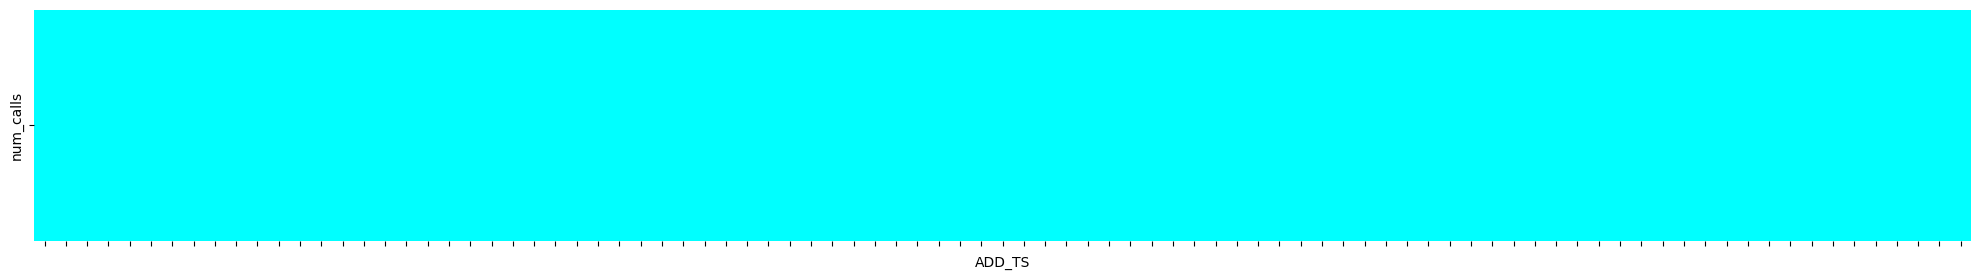

In [33]:
#Create a heatmap to illustrate missing values relative to existing indexes

plt.figure(figsize=(25,3))

ax = sns.heatmap(daily_df.isna().T, cmap='cool', cbar=False)
ax.set(xticklabels=[])

plt.show()
#no missing not ver itresting

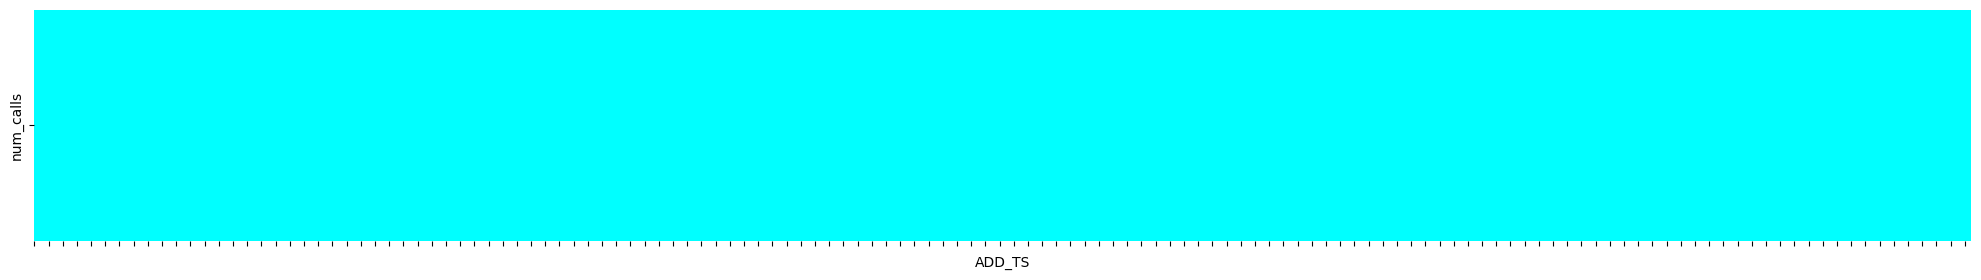

In [34]:
#Create a heatmap to illustrate missing values relative to existing indexes

plt.figure(figsize=(25,3))

ax = sns.heatmap(hourly_df.isna().T, cmap='cool', cbar=False)
ax.set(xticklabels=[])

plt.show()
#no missing not ver itresting

This show we are not missing any data points in both the index and in rows. Good saves a step.<br><br>

Next, we will beging to look at the datas seasonality.

In [35]:
#Beginning with daily
# monthly average
daily_mean = daily_df.groupby(daily_df.index.day_name()).mean()

# relative deviation from the overall mean
daily_mean_diff = (daily_mean - daily_mean.mean())/daily_mean

# month names in right order
day_names = pd.date_range(start=first_day, freq='D', periods=7).day_name()

# reorder columns to follow the month order
daily_mean_diff = daily_mean_diff.loc[day_names, ]

daily_mean_diff.T

fig = px.bar(daily_mean_diff)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '%',
    xaxis_title="",
    title="daily deviation from mean number of calls (%)",
    showlegend=False,
)
fig.show()

Represnted in this graph we can see that again calls on friday are at a much higher rate then the average. While calls on monday and sunday are way below the average.

Plot created with help from chatGPT:<br>
Summary of prompt:<br>
Create a plot in the style of above (insert code above) but for hours in a day

In [36]:
# Calculate the mean number of calls per hour
hourly_mean = hourly_df.mean()

# Calculate the relative deviation from the overall mean
hourly_mean_diff = (hourly_df - hourly_mean) / hourly_mean

# Extract the hour from the datetime index
hourly_mean_diff.index = hourly_mean_diff.index.hour

# Group by the hour of the day to get the average deviation for each hour
hourly_mean_diff_by_hour = hourly_mean_diff.groupby(hourly_mean_diff.index).mean()

# Convert the result to a DataFrame for plotting
hourly_mean_diff_df = hourly_mean_diff_by_hour.reset_index()
hourly_mean_diff_df.columns = ['hour', 'deviation']

#plotting
fig = px.bar(hourly_mean_diff_df, x='hour', y='deviation')

fig.update_layout(
    yaxis_title="Deviation (%)", 
    yaxis_tickformat='%',
    xaxis_title="Hour of the Day",
    title="Hourly Deviation from Mean Number of Calls (%)",
    showlegend=False,
)
fig.show()

The trend we see here is that the peak number of calls in the day are around 4pm decreasing till 5am where there is less then aveage calls per hour.

#### Trend-Seasonal Decomposition
The next transformation to the data is we will decomposte it to try to remove any trends and seaonsal patterns.